In [55]:
import pandas as pd
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import matplotlib
import seaborn as sns
import scipy

#Red
red1= sns.color_palette("Reds_d",1)
red2= sns.color_palette("Reds_d",2)
red3= sns.color_palette("Reds_d",3)
red4= sns.color_palette("Reds_d",4)
red5= sns.color_palette("Reds_d",5)
red6= sns.color_palette("Reds_d",6)
red7= sns.color_palette("Reds_d",7)
red8= sns.color_palette("Reds_d",8)

#YellowGreen
yg1= sns.color_palette("YlGn_d",1)
yg2= sns.color_palette("YlGn_d",2)
yg3= sns.color_palette("YlGn_d",3)
yg4= sns.color_palette("YlGn_d",4)
yg5= sns.color_palette("YlGn_d",5)
yg7= sns.color_palette("YlGn_d",7)

#GreenBlue
gb1= sns.color_palette("GnBu_d",1)
gb2= sns.color_palette("GnBu_d",2)
gb3= sns.color_palette("GnBu_d",3)
gb4= sns.color_palette("GnBu_d",4)
gb5= sns.color_palette("GnBu_d",5)
gb6= sns.color_palette("GnBu_d",6)
gb7= sns.color_palette("GnBu_d",7)
gb8= sns.color_palette("GnBu_d",8)

cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
cp4 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],red7[2], yg7[5],gb7[4]]))
cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],yg7[1],gb7[4]]))
cp3_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[5],red7[0],red7[3],yg7[1],gb7[4]]))
cp2_3 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],yg7[1],gb7[4], gb7[2]]))
cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))

In [2]:
sns.set_palette(cp3)
sns.color_palette()

[(0.6120315263360248, 0.8081330257593233, 0.5357962322183778),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443)]

In [3]:
sns.set_palette(cp2v1)
sns.color_palette()

[(0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.6120315263360248, 0.8081330257593233, 0.5357962322183778)]

In [4]:
sns.set_palette(cp4)
sns.color_palette()

[(0.6120315263360248, 0.8081330257593233, 0.5357962322183778),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.21773010380622843, 0.39735640138408307, 0.268885813148789),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131)]

In [5]:
sns.set_palette(cp3_2)
sns.color_palette()

[(0.5228235294117647, 0.2094948096885813, 0.1949619377162629),
 (0.9364108676150199, 0.5331674996796103, 0.44647776496219393),
 (0.850771241830065, 0.21914033064206087, 0.18984390618992708),
 (0.4879192618223761, 0.7401222606689734, 0.4719192618223761),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131)]

In [6]:
sns.set_palette(cp2_2)
sns.color_palette()

[(0.9364108676150199, 0.5331674996796103, 0.44647776496219393),
 (0.850771241830065, 0.21914033064206087, 0.18984390618992708),
 (0.4879192618223761, 0.7401222606689734, 0.4719192618223761),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131)]

In [7]:
def CoCoPeLia_log_read(filename):
    temp = pd.read_csv(filename, header=None, names = ['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
                                                    'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'timer'], 
                                                     dtype = {'M': np.int64, 'N': np.int64, 'K': np.int64, 'timer': np.float64} )
    temp.sort_values(by=['M','N','K'])
    return temp

def PARALia_log_read(filename):
    temp = pd.read_csv(filename, header=None, names = ['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
                                                    'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'timer', 'pred_t', 'pred_J'], 
                                                     dtype = {'M': np.int64, 'N': np.int64, 'K': np.int64, 'timer': np.float64, 'pred_t': np.float64, 'pred_J': np.float64} )
    temp.sort_values(by=['M','N','K'])
    return temp

def keep_dev_num(num, dataframe):
    return dataframe[dataframe['dev_num'] == num]

    
devices=8
machine = 'vulcan'
Mmax = math.sqrt(32*1e9/(3*8))/256 #Tesla-V100
MemMax = 4*(1024*1024*1024)*devices # Questionable limit
Rmax_Gflops = 7*1024*devices
#Mmax = math.sqrt(11*1e9/(3*8))/256 #Tesla-K40
#machine = 'testbed-II_Tesla-V100'

In [8]:
version="1.5"
split="ST-2D-BLOCK-CYCLIC"
sr_over=""
implementation="_UN-PB-L8"
homedir = "~/mount_vulcan"
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-hetero"
pw_optimize="_PW-PRED-PERF-PER-J-0.00"
impl_hops="_ALL-HOPS-1-0.20"

BLASxEx_data = PARALia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/BLASxExDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('BLASxEx_data len: %d\n' % len(BLASxEx_data))

XKBLAS_nocache_data = PARALia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/XKBLASDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('XKBLAS_nocache_data len: %d\n' % len(XKBLAS_nocache_data))


BLASxEx_data len: 6200

XKBLAS_nocache_data len: 5900



In [9]:
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0 = (PARALia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0 len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0))

CoCopeLia_data_allhops_02pen_ESPA_alldev = keep_dev_num(8, PARALia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_predefined_vals_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_allhops_02pen_ESPA_alldev len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_alldev))

pw_optimize="_PW-PRED-ENERGY-DELAY"
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP = (PARALia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_allhops_02pen_ESPA_pred_EDP len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP))

#pw_optimize="_PW-PRED-POWER-DELAY"
#CoCopeLia_data_allhops_02pen_ESPA_pred_PDP = (PARALia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' 
#                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
#print('CoCopeLia_data_allhops_02pen_ESPA_pred_PDP len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP))

CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0 len: 25400

CoCopeLia_data_allhops_02pen_ESPA_alldev len: 31000

CoCopeLia_data_allhops_02pen_ESPA_pred_EDP len: 15060



In [15]:
def CoCoPeLia_grouby_avg(df):
    result = df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc'], as_index=False, sort=True).mean()
    #print(result)
    return result
#CoCoPeLia_group = CoCoPeLia_grouby_list_avg(CoCopeLia_data)
#print(CoCoPeLia_plot_data)

def CoCoPeLia_modified_grouby_avg(df):
    result = df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'flops', 'bytes', 'loc_str', 'imp'], as_index=False, sort=True).mean()
    #print(result)
    return result
#CoCoPeLia_group = CoCoPeLia_grouby_list_avg(CoCopeLia_data)
#print(CoCoPeLia_plot_data)

def CoCoPeLia_modified_grouby_max(df):
    result = df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'flops', 'bytes', 'loc_str', 'imp'], as_index=False, sort=True).max()
    #print(result)
    return result

def CoCoPeLia_grouby_min(df):
    return df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc'], as_index=False, sort=True).min()

def CoCoPeLia_select_subset(df, subset_str):
    if subset_str == 'square': 
        return df.loc[(df['M'] == df['N']) & (df['M'] == df['K'])]
    elif subset_str == 'fat-thin':
        return df.loc[(df['M'] == df['N']) & (df['M'] > df['K'])]
    elif subset_str == 'thin-fat':        
        return df.loc[(df['M'] == df['N']) & (df['M'] < df['K'])]
    
def CoCoPeLia_select_indata_locs(df, loc1, loc2, loc3):
    return df.loc[(df['Asloc'] == loc1) & (df['Bsloc'] == loc2) & (df['Csloc'] == loc3) & (df['M'] == df['N']) & (df['M'] < df['K'])]

In [16]:
font=8
#plt.rc('font', family='serif', serif='Times') #annoying warning filling my view, so disabled until needed
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)
plt.rc('axes', labelsize=font)
plt.rc('figure', titlesize=font)
# width as measured in inkscape
width = 3.487
height = width / 1.618

#fig, ax = plt.subplots()
#fig.subplots_adjust(left=.15, bottom=.17, right=.99, top=.97)

In [17]:
def dgemm_flops(df):
    df['flops'] = df['M']*df['N']*(2*df['K'] + 2)
    return df['M']*df['N']*(2*df['K'] + 2)
def dgemm_bytes(df):
    df['bytes'] = 8*(df['M']*(df['N']+df['K']) + df['N']*df['K']) 
    return 8*(df['M']*(df['N']+df['K']) + df['N']*df['K']) 

In [19]:
dev_W_avg = (CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['pred_J']/CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['pred_t']/CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['dev_num']).mean()
print(dev_W_avg)

dgemm_bytes(BLASxEx_data)
dgemm_flops(BLASxEx_data)
BLASxEx_data['pred_t'] = BLASxEx_data['pred_J'] = 0
BLASxEx_data['perf'] = BLASxEx_data['flops']/(1e9*BLASxEx_data['timer'])
BLASxEx_data['energy'] = BLASxEx_data['timer']*(dev_W_avg*8)
BLASxEx_data['EDP'] = (BLASxEx_data['perf'])*(BLASxEx_data['perf'])/(dev_W_avg*8)
BLASxEx_data['PDP'] = BLASxEx_data['flops']/(1e9*BLASxEx_data['energy'])
BLASxEx_data['loc_str'] = 100*(BLASxEx_data['Asloc']+1) + 10*(BLASxEx_data['Bsloc']+1) + BLASxEx_data['Csloc']+1
BLASxEx_data['imp'] = '1.BLASX'
print("BLASxEx_data mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s Energy = %lf J, PDP = %lf, EDP = %lf" % 
      (len(CoCoPeLia_modified_grouby_avg(BLASxEx_data)), 
        CoCoPeLia_modified_grouby_avg(BLASxEx_data)['perf'].mean(),
        CoCoPeLia_modified_grouby_avg(BLASxEx_data)['flops'].mean()/CoCoPeLia_modified_grouby_avg(BLASxEx_data)['timer'].mean()/1e9, 
        scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(BLASxEx_data).loc[:,'perf']),
       CoCoPeLia_modified_grouby_avg(BLASxEx_data)['energy'].mean(), CoCoPeLia_modified_grouby_avg(BLASxEx_data)['PDP'].mean() , CoCoPeLia_modified_grouby_avg(BLASxEx_data)['EDP'].mean()))

dgemm_bytes(XKBLAS_nocache_data)
dgemm_flops(XKBLAS_nocache_data)
XKBLAS_nocache_data['pred_t'] = XKBLAS_nocache_data['pred_J'] = 0
XKBLAS_nocache_data['perf'] = XKBLAS_nocache_data['flops']/(1e9*XKBLAS_nocache_data['timer'])
XKBLAS_nocache_data['energy'] = XKBLAS_nocache_data['timer']*(dev_W_avg*8)
XKBLAS_nocache_data['EDP'] = (XKBLAS_nocache_data['perf'])*(XKBLAS_nocache_data['perf'])/(dev_W_avg*8)
XKBLAS_nocache_data['PDP'] = XKBLAS_nocache_data['flops']/(1e9*XKBLAS_nocache_data['energy'])
XKBLAS_nocache_data['loc_str'] = 100*(XKBLAS_nocache_data['Asloc']+1) + 10*(XKBLAS_nocache_data['Bsloc']+1) + XKBLAS_nocache_data['Csloc']+1
XKBLAS_nocache_data['imp'] = '2.XKBLAS'
print("XKBLAS_nocache_data mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
      (len(CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)),   
        CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)['perf'].mean(),
        CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)['flops'].mean()/CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)['timer'].mean()/1e9, 
        scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data).loc[:,'perf']),
       CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)['energy'].mean(), CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)['PDP'].mean(),  CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)['EDP'].mean()))

dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_alldev)
dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_alldev)
CoCopeLia_data_allhops_02pen_ESPA_alldev['perf'] = CoCopeLia_data_allhops_02pen_ESPA_alldev['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_alldev['timer'])
CoCopeLia_data_allhops_02pen_ESPA_alldev['energy'] = CoCopeLia_data_allhops_02pen_ESPA_alldev['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_alldev['dev_num'])
CoCopeLia_data_allhops_02pen_ESPA_alldev['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_alldev['perf']*CoCopeLia_data_allhops_02pen_ESPA_alldev['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_alldev['dev_num']) 
CoCopeLia_data_allhops_02pen_ESPA_alldev['PDP'] = CoCopeLia_data_allhops_02pen_ESPA_alldev['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_alldev['energy'])
CoCopeLia_data_allhops_02pen_ESPA_alldev['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_alldev['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_alldev['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_alldev['Csloc']+1
CoCopeLia_data_allhops_02pen_ESPA_alldev['imp'] = '3.PARALia_1.5 AllDev'
print("CoCopeLia_data_allhops_02pen_ESPA_alldev mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
      (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)),  
        CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)['perf'].mean(),
        CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)['timer'].mean()/1e9, 
        scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev).loc[:,'perf']),
       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)['PDP'].mean(),  
       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)['EDP'].mean()))

dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)
dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['perf'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['timer'])
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['energy'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['dev_num'])
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['perf']*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['dev_num'])
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['PDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['energy'])
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['Csloc']+1
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['imp'] = '4.PARALia_1.5 PRED-PERF'
print("CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0 mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
      (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)),  
        CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)['perf'].mean(),
        CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)['timer'].mean()/1e9, 
        scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0).loc[:,'perf']),
       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)['PDP'].mean(),  
       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)['EDP'].mean()))


dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)
dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['perf'] = CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['timer'])
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['energy'] = CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['dev_num'])
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['perf']*CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['dev_num'])
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['PDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['energy'])
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['Csloc']+1
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['imp'] = '5.PARALia_1.5 PRED-EDP'
print("CoCopeLia_data_allhops_02pen_ESPA_pred_EDP mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
      (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)),  
        CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)['perf'].mean(),
        CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)['timer'].mean()/1e9, 
        scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP).loc[:,'perf']),
       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)['PDP'].mean(),
       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)['EDP'].mean()))
    
if 0:
    dgemm_bytes(cuBLASXt_best_data)
    dgemm_flops(cuBLASXt_best_data)
    cuBLASXt_best_data['pred_t'] = cuBLASXt_best_data['pred_J'] = 0
    cuBLASXt_best_data['perf'] = cuBLASXt_best_data['flops']/(1e9*cuBLASXt_best_data['timer'])
    cuBLASXt_best_data['energy'] = cuBLASXt_best_data['timer']*(dev_W_avg*8)
    cuBLASXt_best_data['EDP'] = (cuBLASXt_best_data['perf'])*(cuBLASXt_best_data['perf'])/(dev_W_avg*8)
    cuBLASXt_best_data['PDP'] = cuBLASXt_best_data['flops']/(1e9*cuBLASXt_best_data['energy'])
    cuBLASXt_best_data['loc_str'] = 100*(cuBLASXt_best_data['Asloc']+1) + 10*(cuBLASXt_best_data['Bsloc']+1) + cuBLASXt_best_data['Csloc']+1
    cuBLASXt_best_data['imp'] = '0.cuBLASXt'
    print("cuBLASXt_best_data mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
          (len(CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)), 
           CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)['perf'].mean(),
           CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)['flops'].mean()/CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)['timer'].mean()/1e9, 
           scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data).loc[:,'perf']),
           CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)['energy'].mean(),  CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)['PDP'].mean(),  CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)['EDP'].mean()))


    dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)
    dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)
    CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['perf'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['timer'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['energy'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['dev_num'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['perf']*CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['dev_num'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['PDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['energy'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['Csloc']+1
    CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['imp'] = '6.PARALia_1.5 PRED-PDP'
    print("CoCopeLia_data_allhops_02pen_ESPA_pred_PDP mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
          (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)),  
            CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)['perf'].mean(),
            CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)['timer'].mean()/1e9, 
            scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP).loc[:,'perf']),
           CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)['PDP'].mean(),  
           CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)['EDP'].mean()))

    dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_predef_dev)
    dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_predef_dev)
    CoCopeLia_data_allhops_02pen_ESPA_predef_dev['perf'] = CoCopeLia_data_allhops_02pen_ESPA_predef_dev['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_predef_dev['timer'])
    CoCopeLia_data_allhops_02pen_ESPA_predef_dev['energy'] = CoCopeLia_data_allhops_02pen_ESPA_predef_dev['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_predef_dev['dev_num'])
    CoCopeLia_data_allhops_02pen_ESPA_predef_dev['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_predef_dev['perf']*CoCopeLia_data_allhops_02pen_ESPA_predef_dev['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_predef_dev['dev_num'])
    CoCopeLia_data_allhops_02pen_ESPA_predef_dev['PDP'] = CoCopeLia_data_allhops_02pen_ESPA_predef_dev['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_predef_dev['energy'])
    CoCopeLia_data_allhops_02pen_ESPA_predef_dev['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_predef_dev['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_predef_dev['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_predef_dev['Csloc']+1
    CoCopeLia_data_allhops_02pen_ESPA_predef_dev['imp'] = 'Predef_dev_dataset'
#print("CoCopeLia_data_allhops_02pen_ESPA_predef_dev mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
#      (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev)['perf'].mean(), 
#       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev)['EDP'].mean()))

#CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1 = CoCopeLia_data_allhops_02pen_ESPA_predef_dev[CoCopeLia_data_allhops_02pen_ESPA_predef_dev['dev_id_token'] == 11101110]
#CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1['imp'] = '6 dev (11101110)'
#print("CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1 mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
#    (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1)['perf'].mean(), 
#    CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1)['EDP'].mean())) 

#CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1 = CoCopeLia_data_allhops_02pen_ESPA_predef_dev[CoCopeLia_data_allhops_02pen_ESPA_predef_dev['dev_id_token'] == 11110000]
#CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1['imp'] = '4 dev (11110000)'
#print("CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1 mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
#    (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1)['perf'].mean(), 
#    CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1)['EDP'].mean())) 

#CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2 = CoCopeLia_data_allhops_02pen_ESPA_predef_dev[CoCopeLia_data_allhops_02pen_ESPA_predef_dev['dev_id_token'] == 1100110]
#CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2['imp'] = '4 dev (01100110)'
#print("CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2 mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
#    (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2)['perf'].mean(), 
#    CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2)['EDP'].mean())) 

#CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best = pd.concat([CoCopeLia_data_allhops_02pen_ESPA_predef_dev])
#CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best['dev_num'] = -1
#CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best['dev_id_token'] = -1
#CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best['imp'] = 'Best select'
#CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best = CoCoPeLia_modified_grouby_max(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best)
#print("CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
#      (len(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best), CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best['perf'].mean(), 
#       CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best['energy'].mean(), CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best['EDP'].mean()))

#dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1)
#dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1)
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['perf'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['timer'])
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['energy'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['dev_num'])
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['perf']*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['dev_num'])
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['PDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['energy'])
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['Csloc']+1
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['imp'] = '6.PARALia_1.5 PPJ-1.0'
#print("CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1 mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
#      (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1)['perf'].mean(), 
#       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1)['PDP'].mean(),  CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1)['EDP'].mean()))

#dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde)
#dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde)
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['perf'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['timer'])
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['energy'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['dev_num'])
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['perf']*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['dev_num'])
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['PDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['energy'])
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['Csloc']+1
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde['imp'] = '7.PARALia_1.5 PPJ-0 (e.g. ~=PERF-olde)'
#print("CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
#      (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde)['perf'].mean(), 
#       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde)['PDP'].mean(),  CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0_olde)['EDP'].mean()))

#dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5)
#dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5)
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['perf'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['timer'])
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['energy'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['dev_num'])
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['perf']*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['dev_num'])
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['PDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['energy'])
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['Csloc']+1
#CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['imp'] = '8.PARALia_1.5 PPJ-5.0'
#print("CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5 mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
#      (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5)['perf'].mean(), 
#       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5)['PDP'].mean(),  CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5)['EDP'].mean()))


284.6844026270164
BLASxEx_data mean of 350 cases -> perf = (ar = 9656.431609, ar/ar = 15590.344035, harmonic = 2720.150452) Gflops/s Energy = 800.773229 J, PDP = 4.239972, EDP = 70478.657070
XKBLAS_nocache_data mean of 320 cases -> perf = (ar = 8583.282968, ar/ar = 13649.812294, harmonic = 997.237527) Gflops/s, Energy = 734.100674 J, PDP = 3.768771, EDP = 56967.773824
CoCopeLia_data_allhops_02pen_ESPA_alldev mean of 350 cases -> perf = (ar = 14621.741955, ar/ar = 22312.320953, harmonic = 1717.647646) Gflops/s, Energy = 559.526289 J, PDP = 6.420154, EDP = 134089.146542
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0 mean of 350 cases -> perf = (ar = 16295.585868, ar/ar = 25823.045988, harmonic = 2746.396302) Gflops/s, Energy = 417.277277 J, PDP = 8.516893, EDP = 200631.095807
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP mean of 237 cases -> perf = (ar = 10914.453661, ar/ar = 16461.895081, harmonic = 2277.936960) Gflops/s, Energy = 483.787785 J, PDP = 10.107545, EDP = 148329.968566


/tmp/ipykernel_6499/1109549086.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['imp'])
/tmp/ipykernel_6499/1109549086.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoCopeLia_all_data_alldev_list[ctr]['Perf. (Tflops)'] = CoCopeLia_all_data_alldev_list[ctr]['perf']/1000
/tmp/ipykernel_6499/1109549086.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

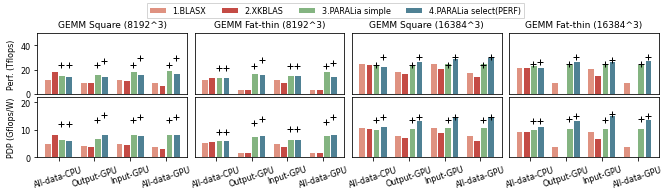

In [128]:
def CoCoPeLia_select_motivation_data_16384(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 16384**3) & (df['M']*df['N']*df['K'] <= 16384**3)) & 
                    (((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == -1)) |
                    ((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == 0))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == -1))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == 0))
                    )]
def CoCoPeLia_select_motivation_data_8192(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 8192**3) & (df['M']*df['N']*df['K'] <= 8192**3)) & 
                    (((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == -1)) |
                    ((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == 0))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == -1))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == 0))
                    )] 

def CoCoPeLia_select_motivation_data_4096(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 4096**3) & (df['M']*df['N']*df['K'] <= 4096**3)) & 
                    (((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == -1)) |
                    ((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == 0))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == -1))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == 0))
                    )] 

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
plot_motiv = 1
if plot_motiv == 1: 
    sns.set_palette(cp2_2)
    sns.color_palette()
    CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,cuBLASXt_best_data])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_alldev])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_EDP])

    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1])

    CoCopeLia_all_data_mean = CoCoPeLia_select_motivation_data_8192(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    CoCopeLia_all_data_mean["pred_perf"] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['pred_t'])

    CoCopeLia_all_data_tmp = CoCoPeLia_select_motivation_data_16384(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    CoCopeLia_all_data_tmp["pred_perf"] = CoCopeLia_all_data_tmp['flops']/(1e9*CoCopeLia_all_data_tmp['pred_t'])

    #CoCopeLia_all_data_mean = pd.concat([CoCopeLia_all_data_mean,CoCopeLia_all_data_tmp]) 
    #CoCopeLia_all_data_mean["pred_perf"] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['pred_t'])
    #print(CoCopeLia_all_data_mean)

    CoCopeLia_all_data_alldev_list = []
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'fat-thin'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_tmp,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_tmp,'fat-thin'))
    #CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'thin-fat'))
    elem_name=['GEMM Square (8192^3)', 'GEMM Fat-thin (8192^3)','GEMM Square (16384^3)', 'GEMM Fat-thin (16384^3)']
    fig, ax = plt.subplots(2,4)
    for ctr in range(0,len(ax[0])):
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev', 'imp'] = '3.PARALia simple'
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '4.PARALia_1.5 PRED-PERF', 'imp'] = '4.PARALia select(PERF)'
        CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['imp'])
        CoCopeLia_all_data_alldev_list[ctr]['Perf. (Tflops)'] = CoCopeLia_all_data_alldev_list[ctr]['perf']/1000
        sns.barplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'Perf. (Tflops)', hue = 'imp', ax=ax[0][ctr])
        #print(CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev'])
        CopeLia_all_data_pred =  pd.concat([CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia simple'],
                                        CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '4.PARALia select(PERF)']])
        CopeLia_all_data_pred.sort_values(inplace = True, ignore_index = True, by = ['loc_str','imp'])
        ax[0][ctr].plot(list(map(lambda x: x + 0.08, [0,0.2,1,1.2,2,2.2,3,3.2])), list(CopeLia_all_data_pred['pred_perf']/1000), '+', color = 'k')
        change_width(ax[0][ctr], .16)
        ax[0][ctr].set_ylim([0,50])
        ax[0][ctr].set_title(elem_name[ctr], size = font+1)
        ax[0][ctr].get_legend().remove()
        if(ctr>0): 
            ax[0][ctr].set_yticks([])
            ax[0][ctr].set_ylabel('')
        ax[0][ctr].set_xlabel('')
        ax[0][ctr].set_xticks([])
        ax[0][ctr].set_xticklabels([])
        #ax[0][ctr].set_xticklabels(['All-data-CPU', 'Output-GPU', 'Input-GPU','All-data-GPU'], rotation = 25)
        if ctr == 0: 
            fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
                fontsize=font, fancybox = False, ncol=6)
    #fig.savefig('Plots/MaxDev/Plot_testbed-%s_motivation-perf.pdf' % (machine))

    CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,cuBLASXt_best_data])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_alldev])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_EDP])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1])
    
    CoCopeLia_all_data_tmp = CoCoPeLia_select_motivation_data_16384(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    CoCopeLia_all_data_tmp["pred_perf"] = CoCopeLia_all_data_tmp['flops']/(1e9*CoCopeLia_all_data_tmp['pred_t'])
    
    CoCopeLia_all_data_mean = CoCoPeLia_select_motivation_data_8192(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    CoCopeLia_all_data_mean["pred_perf"] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['pred_t'])

    #CoCopeLia_all_data_mean = pd.concat([CoCopeLia_all_data_mean,CoCopeLia_all_data_tmp]) 
    #CoCopeLia_all_data_mean["pred_perf"] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['pred_t'])
    #print(CoCopeLia_all_data_mean)

    CoCopeLia_all_data_alldev_list = []
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'fat-thin'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_tmp,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_tmp,'fat-thin'))
    #CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'thin-fat'))
    elem_name=['GEMM Square 4096^3', 'GEMM Fat-thin ~4096^3', 'GEMM Square 8192^3', 'GEMM Fat-thin ~8192^3']
    #fig, ax = plt.subplots(2,4)
    #fig.set_size_inches(width*9/4, height)
    for ctr in range(0,len(ax[1])):
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev', 'imp'] = '3.PARALia simple'
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '4.PARALia_1.5 PRED-PERF', 'imp'] = '4.PARALia select(PERF)'
        CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['imp'])
        CoCopeLia_all_data_alldev_list[ctr]['PDP (Gflops/W)'] = CoCopeLia_all_data_alldev_list[ctr]['flops']/(1e9*CoCopeLia_all_data_alldev_list[ctr]['energy'])
        CoCopeLia_all_data_alldev_list[ctr]['PDP_pred'] = CoCopeLia_all_data_alldev_list[ctr]['flops']/(1e9*CoCopeLia_all_data_alldev_list[ctr]['pred_J'])   
        #CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['loc_str'])
        sns.barplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'PDP (Gflops/W)', hue = 'imp', ax=ax[1][ctr])
        #print(CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev'])
        CopeLia_all_data_EDP_pred =  pd.concat([CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia simple'],
                                        CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '4.PARALia select(PERF)']])
        CopeLia_all_data_EDP_pred.sort_values(inplace = True, ignore_index = True, by = ['loc_str','imp'])
        ax[1][ctr].plot(list(map(lambda x: x + 0.08, [0,0.2,1,1.2,2,2.2,3,3.2])), list(CopeLia_all_data_EDP_pred['PDP_pred']), '+', color = 'k')
        change_width(ax[1][ctr], .16)
        ax[1][ctr].set_ylim([0,22])
        ax[1][ctr].set_title('')
        ax[1][ctr].get_legend().remove()
        ax[1][ctr].set_xticks(np.arange(4))
        if(ctr>0): 
            ax[1][ctr].set_yticks([])
            ax[1][ctr].set_ylabel('')
        ax[1][ctr].set_xlabel('')
        #ax[1][ctr].set_xticklabels(['4096_loc=AllCPU', '8192_loc=AllCPU', '4096_loc=C-GPU', '8192_loc=C-GPU', '4096_loc=A,B-GPU', '8192_loc=A,B-GPU', '4096_loc=AllGPU', '8192_loc=AllGPU', ''], rotation = 25)
        ax[1][ctr].set_xticklabels(['All-data-CPU', 'Output-GPU', 'Input-GPU','All-data-GPU'], rotation = 18)
    fig.set_size_inches(width*10/4, height)
    fig.subplots_adjust(left=0, bottom=0, right=0.99, top=0.8, wspace=0.05, hspace=0.05)
    fig.savefig('Plots/Heter/Plot_testbed-%s_motivation-full.pdf' % (machine))

In [ ]:
plot_motiv_old = 0
if plot_motiv_old == 1: 
    CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,cuBLASXt_best_data])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_alldev])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_EDP])

    CoCopeLia_all_data_mean = CoCoPeLia_select_motivation_data_4096(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    #CoCopeLia_all_data_mean['loc_str'] = list(map(lambda x: str(x) +  '_4096', CoCopeLia_all_data_mean['loc_str']))
    CoCopeLia_all_data_mean["pred_perf"] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['pred_t'])

    CoCopeLia_all_data_tmp = CoCoPeLia_select_motivation_data_8192(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    #CoCopeLia_all_data_tmp['loc_str'] = list(map(lambda x: str(x) +  '_8192', CoCopeLia_all_data_tmp['loc_str']))
    CoCopeLia_all_data_tmp["pred_perf"] = CoCopeLia_all_data_tmp['flops']/(1e9*CoCopeLia_all_data_tmp['pred_t'])

    #CoCopeLia_all_data_mean = pd.concat([CoCopeLia_all_data_mean,CoCopeLia_all_data_tmp]) 
    #CoCopeLia_all_data_mean["pred_perf"] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['pred_t'])
    #print(CoCopeLia_all_data_mean)

    CoCopeLia_all_data_alldev_list = []
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'fat-thin'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_tmp,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_tmp,'fat-thin'))
    #CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'thin-fat'))
    elem_name=['Square 4096^3', 'Fat-thin ~4096^3', 'Square 8192^3', 'Fat-thin ~8192^3']
    #fig, ax = plt.subplots(2,4)
    #fig.set_size_inches(width*9/4, height)
    for ctr in range(0,len(ax[1])):
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev', 'imp'] = '3.PARALia simple'
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '5.PARALia_1.5 PPJ-1.0', 'imp'] = '4.PARALia select'
        CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['imp'])
        CoCopeLia_all_data_alldev_list[ctr]['PDP (Gflops/W)'] = CoCopeLia_all_data_alldev_list[ctr]['flops']/(1e9*CoCopeLia_all_data_alldev_list[ctr]['energy'])
        CoCopeLia_all_data_alldev_list[ctr]['PDP_pred'] = CoCopeLia_all_data_alldev_list[ctr]['flops']/(1e9*CoCopeLia_all_data_alldev_list[ctr]['pred_J'])   
        #CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['loc_str'])
        sns.barplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'PDP (Tflops/W)', hue = 'imp', ax=ax[1][ctr])
        #print(CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev'])
        CopeLia_all_data_EDP_pred =  pd.concat([CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia max devices'],
                                        CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '4.PARALia + util awareness']])
        CopeLia_all_data_EDP_pred.sort_values(inplace = True, ignore_index = True, by = ['loc_str','imp'])
        ax[1][ctr].plot(list(map(lambda x: x + 0.08, [0,0.2,1,1.2,2,2.2,3,3.2])), list(0.85*CopeLia_all_data_EDP_pred['PDP_pred']), '+', color = 'k')
        change_width(ax[1][ctr], .16)
        ax[1][ctr].set_ylim([0,24])
        ax[1][ctr].set_title(elem_name[ctr])
        ax[1][ctr].get_legend().remove()
        ax[1][ctr].set_xticks(np.arange(4))
        if(ctr>0): 
            ax[1][ctr].set_yticks([])
            ax[1][ctr].set_ylabel('')
        ax[1][ctr].set_xlabel('')
        #ax[1][ctr].set_xticklabels(['4096_loc=AllCPU', '8192_loc=AllCPU', '4096_loc=C-GPU', '8192_loc=C-GPU', '4096_loc=A,B-GPU', '8192_loc=A,B-GPU', '4096_loc=AllGPU', '8192_loc=AllGPU', ''], rotation = 25)
        ax[1][ctr].set_xticklabels(['All-CPU', 'C-GPU', 'A,B-GPU','All-GPU'], rotation = 25)
    fig.tight_layout()
    fig.subplots_adjust(left=.0, bottom=.0, right=.99, top=.76)
    fig.savefig('Plots/Heter/Plot_testbed-%s_motivation-perf.pdf' % (machine))

In [25]:
def CoCoPeLia_enforce_dataset_min_limits(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 4096**3)) ]

CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_alldev])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0])
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1]) 
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_EDP])
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PDP])

CoCopeLia_all_data_mean = CoCoPeLia_enforce_dataset_min_limits(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))

print("BLASX (%d cases) & (ar = %.2lf, ar/ar(hoef) = %.2lf, har = %.2lf) & %.2lf     & (ar = %.2lf, ar/ar(hoef) = %.2lf, har = %.2lf), &  %.2lf\\\\" % 
    (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '1.BLASX'])), 
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '1.BLASX'])['perf'].mean(),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '1.BLASX'])['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '1.BLASX'])['timer'].mean()/1e9, 
    scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '1.BLASX']).loc[:,'perf']),

     CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '1.BLASX'])['energy'].mean(), 

    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '1.BLASX'])['PDP'].mean(),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '1.BLASX'])['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '1.BLASX'])['energy'].mean()/1e9, 
    scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '1.BLASX']).loc[:,'PDP']),

    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '1.BLASX'])['EDP'].mean()))

print("XKBLAS (%d cases) & (ar = %.2lf, ar/ar(hoef) = %.2lf, har = %.2lf) & %.2lf     & (ar = %.2lf, ar/ar(hoef) = %.2lf, har = %.2lf), &  %.2lf\\\\" % 
    (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '2.XKBLAS'])), 
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '2.XKBLAS'])['perf'].mean(),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '2.XKBLAS'])['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '2.XKBLAS'])['timer'].mean()/1e9, 
    scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] =='2.XKBLAS']).loc[:,'perf']),

     CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '2.XKBLAS'])['energy'].mean(), 

    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '2.XKBLAS'])['PDP'].mean(),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '2.XKBLAS'])['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '2.XKBLAS'])['energy'].mean()/1e9, 
    scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '2.XKBLAS']).loc[:,'PDP']),

    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '2.XKBLAS'])['EDP'].mean()))

print("PARALia simple (%d cases) & (ar = %.2lf, ar/ar(hoef) = %.2lf, har = %.2lf) & %.2lf     & (ar = %.2lf, ar/ar(hoef) = %.2lf, har = %.2lf), &  %.2lf\\\\" % 
    (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])), 
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])['perf'].mean(),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])['timer'].mean()/1e9, 
    scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev']).loc[:,'perf']),

     CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])['energy'].mean(), 

    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])['PDP'].mean(),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])['energy'].mean()/1e9, 
    scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev']).loc[:,'PDP']),

    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])['EDP'].mean()))

print("PARALia select(PERF) (%d cases) & (ar = %.2lf, ar/ar(hoef) = %.2lf, har = %.2lf) & %.2lf     & (ar = %.2lf, ar/ar(hoef) = %.2lf, har = %.2lf), &  %.2lf\\\\" %  
    (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF'])), 
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] =='4.PARALia_1.5 PRED-PERF'])['perf'].mean(),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF'])['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF'])['timer'].mean()/1e9, 
    scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF']).loc[:,'perf']),

     CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF'])['energy'].mean(), 

    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF'])['PDP'].mean(),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] =='4.PARALia_1.5 PRED-PERF'])['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF'])['energy'].mean()/1e9, 
    scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF']).loc[:,'PDP']),

    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF'])['EDP'].mean()))


print("PARALia select(EDP) (%d cases) & (ar = %.2lf, ar/ar(hoef) = %.2lf, har = %.2lf) & %.2lf     & (ar = %.2lf, ar/ar(hoef) = %.2lf, har = %.2lf), &  %.2lf\\\\" % 
    (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])), 
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])['perf'].mean(),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])['timer'].mean()/1e9, 
    scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP']).loc[:,'perf']),

     CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])['energy'].mean(), 

    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])['PDP'].mean(),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])['energy'].mean()/1e9, 
    scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP']).loc[:,'PDP']),

    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])['EDP'].mean()))
if 0:
    print("PARALia select(PDP) (%d cases) & (ar = %.2lf, ar/ar(hoef) = %.2lf, har = %.2lf) & %.2lf     & (ar = %.2lf, ar/ar(hoef) = %.2lf, har = %.2lf), &  %.2lf\\\\" % 
        (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP'])), 
        CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] =='6.PARALia_1.5 PRED-PDP'])['perf'].mean(),
        CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] =='6.PARALia_1.5 PRED-PDP'])['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP'])['timer'].mean()/1e9, 
        scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP']).loc[:,'perf']),

         CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP'])['energy'].mean(), 

        CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP'])['PDP'].mean(),
        CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP'])['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP'])['energy'].mean()/1e9, 
        scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP']).loc[:,'PDP']),

        CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP'])['EDP'].mean()))

CoCopeLia_all_data_mean['per-rat-cuBLASXt'] = -1
CoCopeLia_all_data_mean['per-rat-BLASX'] = 1
CoCopeLia_all_data_mean['per-rat-XKBLAS'] = 1
CoCopeLia_all_data_mean['pdp-rat-cuBLASXt'] = -1
CoCopeLia_all_data_mean['pdp-rat-BLASX'] = 1
CoCopeLia_all_data_mean['pdp-rat-XKBLAS'] = 1
run_perper_comp = 1
if run_perper_comp == 1:
    BLASX_comp_agg_data = CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '1.BLASX']
    XKBLAS_comp_agg_data = CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '2.XKBLAS']
    for index, row in BLASX_comp_agg_data.iterrows():
        CoCopeLia_all_data_mean.loc[(CoCopeLia_all_data_mean['M'] == row['M']) & (CoCopeLia_all_data_mean['N'] == row['N']) & (CoCopeLia_all_data_mean['K'] == row['K']) &
                                    (CoCopeLia_all_data_mean['Asloc'] == row['Asloc']) & (CoCopeLia_all_data_mean['Bsloc'] == row['Bsloc']) & (CoCopeLia_all_data_mean['Csloc'] == row['Csloc'])
                                    , 'per-rat-BLASX'] = CoCopeLia_all_data_mean[(CoCopeLia_all_data_mean['M'] == row['M']) & (CoCopeLia_all_data_mean['N'] == row['N']) & (CoCopeLia_all_data_mean['K'] == row['K']) &
                                    (CoCopeLia_all_data_mean['Asloc'] == row['Asloc']) & (CoCopeLia_all_data_mean['Bsloc'] == row['Bsloc']) & (CoCopeLia_all_data_mean['Csloc'] == row['Csloc'])]['perf']/row['perf'] #- row['perf']) /row['perf']*100
        CoCopeLia_all_data_mean.loc[(CoCopeLia_all_data_mean['M'] == row['M']) & (CoCopeLia_all_data_mean['N'] == row['N']) & (CoCopeLia_all_data_mean['K'] == row['K']) &
                                    (CoCopeLia_all_data_mean['Asloc'] == row['Asloc']) & (CoCopeLia_all_data_mean['Bsloc'] == row['Bsloc']) & (CoCopeLia_all_data_mean['Csloc'] == row['Csloc'])
                                    , 'pdp-rat-BLASX'] = CoCopeLia_all_data_mean[(CoCopeLia_all_data_mean['M'] == row['M']) & (CoCopeLia_all_data_mean['N'] == row['N']) & (CoCopeLia_all_data_mean['K'] == row['K']) &
                                    (CoCopeLia_all_data_mean['Asloc'] == row['Asloc']) & (CoCopeLia_all_data_mean['Bsloc'] == row['Bsloc']) & (CoCopeLia_all_data_mean['Csloc'] == row['Csloc'])]['PDP']/row['PDP'] #- row['PDP']) /row['PDP']*100            
    for index, row in XKBLAS_comp_agg_data.iterrows():
        CoCopeLia_all_data_mean.loc[(CoCopeLia_all_data_mean['M'] == row['M']) & (CoCopeLia_all_data_mean['N'] == row['N']) & (CoCopeLia_all_data_mean['K'] == row['K']) &
                                    (CoCopeLia_all_data_mean['Asloc'] == row['Asloc']) & (CoCopeLia_all_data_mean['Bsloc'] == row['Bsloc']) & (CoCopeLia_all_data_mean['Csloc'] == row['Csloc'])
                                    , 'per-rat-XKBLAS'] = CoCopeLia_all_data_mean[(CoCopeLia_all_data_mean['M'] == row['M']) & (CoCopeLia_all_data_mean['N'] == row['N']) & (CoCopeLia_all_data_mean['K'] == row['K']) &
                                    (CoCopeLia_all_data_mean['Asloc'] == row['Asloc']) & (CoCopeLia_all_data_mean['Bsloc'] == row['Bsloc']) & (CoCopeLia_all_data_mean['Csloc'] == row['Csloc'])]['perf']/row['perf'] #- row['perf']) /row['perf']*100
        CoCopeLia_all_data_mean.loc[(CoCopeLia_all_data_mean['M'] == row['M']) & (CoCopeLia_all_data_mean['N'] == row['N']) & (CoCopeLia_all_data_mean['K'] == row['K']) &
                                    (CoCopeLia_all_data_mean['Asloc'] == row['Asloc']) & (CoCopeLia_all_data_mean['Bsloc'] == row['Bsloc']) & (CoCopeLia_all_data_mean['Csloc'] == row['Csloc'])
                                    , 'pdp-rat-XKBLAS'] = CoCopeLia_all_data_mean[(CoCopeLia_all_data_mean['M'] == row['M']) & (CoCopeLia_all_data_mean['N'] == row['N']) & (CoCopeLia_all_data_mean['K'] == row['K']) &
                                    (CoCopeLia_all_data_mean['Asloc'] == row['Asloc']) & (CoCopeLia_all_data_mean['Bsloc'] == row['Bsloc']) & (CoCopeLia_all_data_mean['Csloc'] == row['Csloc'])]['PDP']/row['PDP'] #- row['PDP']) /row['PDP']*100

print("\nImplementation                     &      Percentile performance versus      &         Percentile PDP versus          ") 
print("                                     & cuBLASXt (%) &  BLASX (%) &  XKBLAS (%) & cuBLASXt (%) &  BLASX (%) &  XKBLAS (%)")

print("PARALia simple (%d cases)  & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf \\\\" %  
    (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])), 
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])['per-rat-cuBLASXt'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev']).loc[:,'per-rat-cuBLASXt']),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])['per-rat-BLASX'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev']).loc[:,'per-rat-BLASX']),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])['per-rat-XKBLAS'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev']).loc[:,'per-rat-XKBLAS']),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])['pdp-rat-cuBLASXt'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev']).loc[:,'pdp-rat-cuBLASXt']),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])['pdp-rat-BLASX'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev']).loc[:,'pdp-rat-BLASX']),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev'])['pdp-rat-XKBLAS'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '3.PARALia_1.5 AllDev']).loc[:,'pdp-rat-XKBLAS'])))     

print("PARALia select(PERF) (%d cases) & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf \\\\" % 
    (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF'])), 
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF'])['per-rat-cuBLASXt'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF']).loc[:,'per-rat-cuBLASXt']),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF'])['per-rat-BLASX'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF']).loc[:,'per-rat-BLASX']),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF'])['per-rat-XKBLAS'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF']).loc[:,'per-rat-XKBLAS']),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF'])['pdp-rat-cuBLASXt'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF']).loc[:,'pdp-rat-cuBLASXt']),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF'])['pdp-rat-BLASX'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF']).loc[:,'pdp-rat-BLASX']),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF'])['pdp-rat-XKBLAS'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '4.PARALia_1.5 PRED-PERF']).loc[:,'pdp-rat-XKBLAS'])))

print("PARALia select(EDP) (%d cases) & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf \\\\" % 
    (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])), 
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])['per-rat-cuBLASXt'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP']).loc[:,'per-rat-cuBLASXt']),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])['per-rat-BLASX'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP']).loc[:,'per-rat-BLASX']),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])['per-rat-XKBLAS'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP']).loc[:,'per-rat-XKBLAS']),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])['pdp-rat-cuBLASXt'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP']).loc[:,'pdp-rat-cuBLASXt']),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])['pdp-rat-BLASX'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP']).loc[:,'pdp-rat-BLASX']),
    CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP'])['pdp-rat-XKBLAS'].mean(),
    scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '5.PARALia_1.5 PRED-EDP']).loc[:,'pdp-rat-XKBLAS'])))
if 0:
    print("PARALia select(PDP) (%d cases) & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf & ar-%.2lf, geo-%.2lf \\\\" % 
        (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP'])), 
        CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP'])['per-rat-cuBLASXt'].mean(),
        scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP']).loc[:,'per-rat-cuBLASXt']),
        CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP'])['per-rat-BLASX'].mean(),
        scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP']).loc[:,'per-rat-BLASX']),
        CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP'])['per-rat-XKBLAS'].mean(),
        scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP']).loc[:,'per-rat-XKBLAS']),
        CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP'])['pdp-rat-cuBLASXt'].mean(),
        scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP']).loc[:,'pdp-rat-cuBLASXt']),
        CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP'])['pdp-rat-BLASX'].mean(),
        scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP']).loc[:,'pdp-rat-BLASX']),
        CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP'])['pdp-rat-XKBLAS'].mean(),
        scipy.stats.gmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_mean[CoCopeLia_all_data_mean['imp'] == '6.PARALia_1.5 PRED-PDP']).loc[:,'pdp-rat-XKBLAS'])))

BLASX (280 cases) & (ar = 11755.30, ar/ar(hoef) = 15890.57, har = 5734.98) & 980.65     & (ar = 5.16, ar/ar(hoef) = 6.98, har = 2.52), &  87864.42\\
XKBLAS (250 cases) & (ar = 10798.31, ar/ar(hoef) = 14339.48, har = 5462.08) & 892.72     & (ar = 4.74, ar/ar(hoef) = 6.30, har = 2.40), &  72832.53\\
PARALia simple (280 cases) & (ar = 18031.16, ar/ar(hoef) = 23199.66, har = 12356.47) & 671.70     & (ar = 7.92, ar/ar(hoef) = 10.19, har = 5.43), &  167450.03\\
PARALia select(PERF) (280 cases) & (ar = 20057.87, ar/ar(hoef) = 26804.19, har = 12839.98) & 510.47     & (ar = 10.13, ar/ar(hoef) = 13.40, har = 6.33), &  249911.06\\
PARALia select(EDP) (176 cases) & (ar = 14174.81, ar/ar(hoef) = 16778.48, har = 11006.64) & 642.79     & (ar = 12.67, ar/ar(hoef) = 14.79, har = 9.74), &  197665.78\\

Implementation                     &      Percentile performance versus      &         Percentile PDP versus          
                                     & cuBLASXt (%) &  BLASX (%) &  XKBLAS (%) & cuBL

/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:279: RuntimeWarning: invalid value encountered in log
  log_a = np.log(np.array(a, dtype=dtype))
/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:279: RuntimeWarning: invalid value encountered in log
  log_a = np.log(np.array(a, dtype=dtype))
/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:279: RuntimeWarning: invalid value encountered in log
  log_a = np.log(np.array(a, dtype=dtype))
/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:279: RuntimeWarning: invalid value encountered in log
  log_a = np.log(np.array(a, dtype=dtype))
/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:279: RuntimeWarning: invalid value encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


PARALia select(EDP) (176 cases) & ar--1.00, geo-nan & ar-1.20, geo-1.06 & ar-1.22, geo-1.09 & ar--1.00, geo-nan & ar-2.52, geo-2.16 & ar-2.41, geo-2.05 \\


/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:279: RuntimeWarning: invalid value encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


/tmp/ipykernel_6499/3248040609.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, by = ['imp'])
/tmp/ipykernel_6499/3248040609.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, by = ['imp'])
/tmp/ipykernel_6499/3248040609.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoCopeLia_all_data_alldev_list[

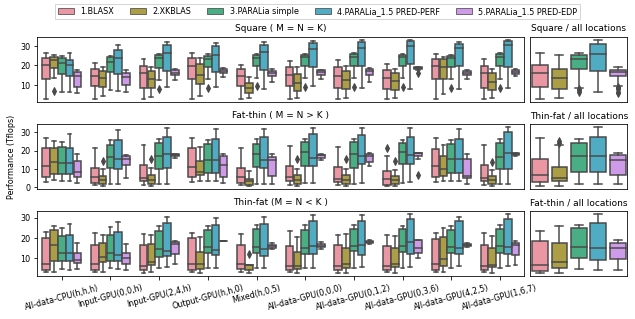

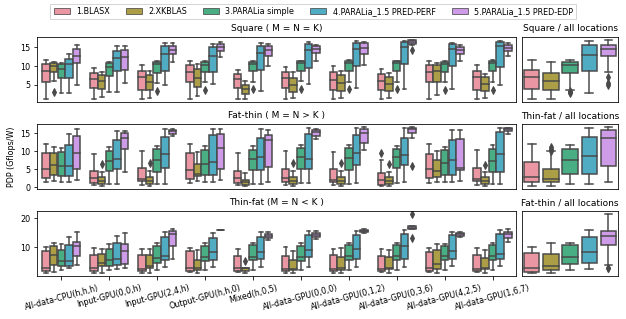

In [27]:
def CoCoPeLia_enforce_dataset_min_limits(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 4096**3)) ]

#sns.set_palette(cp3_2)
#sns.color_palette()

CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_alldev])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0])
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1]) 
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_EDP])

CoCopeLia_all_data_mean = CoCoPeLia_enforce_dataset_min_limits(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
CoCopeLia_all_data_mean['PDP (Gflops/W)'] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['energy'])
CoCopeLia_all_data_mean['Performance (Tflops)'] = CoCopeLia_all_data_mean['perf']/1000

#print(CoCopeLia_all_data_mean.head(5))
CoCopeLia_all_data_alldev_list = []
CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'square'))
CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'fat-thin'))
CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'thin-fat'))
#CoCopeLia_all_data_alldev_list.append(CoCopeLia_all_data_mean)

elem_name=['Square ( M = N = K)', 'Fat-thin ( M = N > K )', 'Thin-fat (M = N < K )']
fig, ax = plt.subplots(len(CoCopeLia_all_data_alldev_list),2, gridspec_kw={'width_ratios': [5, 1]})
for ctr in range(0,len(CoCopeLia_all_data_alldev_list)):
    CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev', 'imp'] = '3.PARALia simple'
    CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '5.PARALia_1.5 PRED-PERF', 'imp'] = '4.PARALia select~PERF'
    CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, by = ['imp'])
    sns.boxplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'Performance (Tflops)', hue = 'imp', ax=ax[ctr][0])
    if (ctr < 3):
        ax[ctr][0].set_title(elem_name[ctr], size = font+1)   
    else:
        ax[ctr][0].set_title('All data shapes', size = font+1)    
    if(ctr!=len(CoCopeLia_all_data_alldev_list)-1): 
        ax[ctr][0].set_xticks([])
        ax[ctr][0].set_xlabel('')
    else:
        #ax[ctr][0].set_xticklabels(['[-1,-1,-1]', '[0,0,-1]', '[4,2,-1]', '[-1,-1,0]', '[-1,0,5]', '[0,0,0]', '[0,1,2]', '[0,3,6]', '[4,2,5]', '[1,6,7]'])
        ax[ctr][0].set_xticklabels(['All-data-CPU(h,h,h)', 'Input-GPU(0,0,h)', 'Input-GPU(2,4,h)','Output-GPU(h,h,0)', 'Mixed(h,0,5)', 
                                    'All-data-GPU(0,0,0)','All-data-GPU(0,1,2)','All-data-GPU(0,3,6)','All-data-GPU(4,2,5)','All-data-GPU(1,6,7)'], rotation = 15)
    if(ctr!=1):     
        ax[ctr][0].set_ylabel('')
    ax[ctr][0].get_legend().remove()
    #ax[ctr][0].set_ylim([0,58])
    #ax[ctr][1].set_ylim([0,58])
    #ax[ctr].set_yscale('log')
    #ax[ctr].set_ylim([0.05,100])
    #ax[ctr].set_xticks([])
    ax[ctr][0].set_xlabel('')
    sns.boxplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'imp', y = 'Performance (Tflops)', ax=ax[ctr][1])
    ax[ctr][1].set_xticks([])
    ax[ctr][1].set_yticks([])
    ax[ctr][1].set_yticklabels('')
    ax[ctr][1].set_ylabel('') 
    ax[ctr][1].set_xlabel('')
    if (ctr == 0):
        ax[ctr][1].set_title('Square / all locations', size = font+1)
    if (ctr == 1):
        ax[ctr][1].set_title('Thin-fat / all locations', size = font+1)    
    if (ctr == 2):
        ax[ctr][1].set_title('Fat-thin / all locations', size = font+1)   
    elif (ctr == 3):
        ax[ctr][1].set_title('Total Dataset', size = font+1)
                             
    if ctr == 0:     
        fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
            fontsize=font, fancybox = False, ncol=6)
fig.set_size_inches(width*10/4, height*2)
fig.subplots_adjust(left=.05, bottom=.12, right=.99, top=.89, wspace=0.02, hspace=0.34)        
fig.savefig('Plots/MaxDev/Plot_testbed-%s_gflops_sumup.pdf' % (machine))
fig.savefig('Plots/MaxDev/Plot_testbed-%s_gflops_sumup.png' % (machine)) 
fig, ax = plt.subplots(len(CoCopeLia_all_data_alldev_list),2, gridspec_kw={'width_ratios': [5, 1]})
for ctr in range(0,len(CoCopeLia_all_data_alldev_list)):
    CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev', 'imp'] = '3.PARALia simple'
    CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '5.PARALia_1.5 PRED-PERF', 'imp'] = '4.PARALia select~PERF'
    CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, by = ['imp'])
    sns.boxplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'PDP (Gflops/W)', hue = 'imp', ax=ax[ctr][0])
    #ax[ctr][0].set_yscale('log') 
    if (ctr < 3):
        ax[ctr][0].set_title(elem_name[ctr], size = font+1)   
    else:
        ax[ctr][0].set_title('All data shapes', size = font+1)    
    if(ctr!=len(CoCopeLia_all_data_alldev_list)-1): 
        ax[ctr][0].set_xticks([])
        ax[ctr][0].set_xlabel('')
    else:
        #ax[ctr][0].set_xticklabels(['[-1,-1,-1]', '[0,0,-1]', '[4,2,-1]', '[-1,-1,0]', '[-1,0,5]', '[0,0,0]', '[0,1,2]', '[0,3,6]', '[4,2,5]', '[1,6,7]'])
        ax[ctr][0].set_xticklabels(['All-data-CPU(h,h,h)', 'Input-GPU(0,0,h)', 'Input-GPU(2,4,h)','Output-GPU(h,h,0)', 'Mixed(h,0,5)', 
                                    'All-data-GPU(0,0,0)','All-data-GPU(0,1,2)','All-data-GPU(0,3,6)','All-data-GPU(4,2,5)','All-data-GPU(1,6,7)'], rotation = 15)
    if(ctr!=1):     
        ax[ctr][0].set_ylabel('')
    ax[ctr][0].get_legend().remove()
    ax[ctr][0].set_xlabel('')
    sns.boxplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'imp', y = 'PDP (Gflops/W)', ax=ax[ctr][1])
    #ax[ctr][1].set_yscale('log')
    ax[ctr][1].set_yticks([])
    ax[ctr][1].set_yticklabels('')
    ax[ctr][1].minorticks_off()
    ax[ctr][1].set_xticks([])
    ax[ctr][1].set_ylabel('') 
    ax[ctr][1].set_xlabel('')
    if (ctr == 0):
        ax[ctr][1].set_title('Square / all locations', size = font+1)
    if (ctr == 1):
        ax[ctr][1].set_title('Thin-fat / all locations', size = font+1)    
    if (ctr == 2):
        ax[ctr][1].set_title('Fat-thin / all locations', size = font+1)   
    elif (ctr == 3):
        ax[ctr][1].set_title('Total Dataset', size = font+1)
                             
    if ctr == 0:     
        fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
            fontsize=font, fancybox = False, ncol=6)
fig.set_size_inches(width*10/4, height*2)
fig.subplots_adjust(left=.065, bottom=.12, right=.99, top=.89, wspace=0.02, hspace=0.34)
fig.savefig('Plots/Heter/Plot_testbed-%s_Energy_sumup.pdf' % (machine))    
fig.savefig('Plots/Heter/Plot_testbed-%s_Energy_sumup.png' % (machine)) 

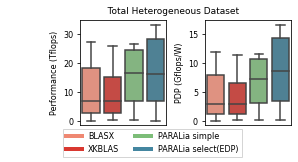

In [126]:
def CoCoPeLia_enforce_dataset_min_limits(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 2048**3)) ]

sns.set_palette(cp2_2)
#sns.color_palette()

CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_alldev])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0])
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1]) 
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5])
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_EDP])

CoCopeLia_all_data_mean = CoCoPeLia_enforce_dataset_min_limits(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
CoCopeLia_all_data_mean['PDP (Gflops/W)'] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['energy'])
CoCopeLia_all_data_mean['Performance (Tflops)'] = CoCopeLia_all_data_mean['perf']/1000

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cp2_2[0], lw=4),
                Line2D([0], [0], color=cp2_2[1], lw=4),
                Line2D([0], [0], color=cp2_2[2], lw=4),
                Line2D([0], [0], color=cp2_2[3], lw=4)]

fig, ax = plt.subplots(1,2)
CoCopeLia_all_data_mean.sort_values(inplace = True, by = ['imp'])

sns.boxplot(data=CoCopeLia_all_data_mean, x = 'imp', y = 'Performance (Tflops)', ax = ax[0])
ax[0].set_title('                                   Total Heterogeneous Dataset', size = font+1)
    #ax[ctr][0].set_ylim([0,58])
    #ax[ctr][1].set_ylim([0,58])
    #ax[ctr].set_yscale('log')
    #ax[ctr].set_ylim([0.05,100])
    #x[ctr].set_xticks([])
ax[0].set_xlabel('')
sns.boxplot(data=CoCopeLia_all_data_mean, x = 'imp', y = 'PDP (Gflops/W)', ax = ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 15)
ax[0].set_xticks([])
ax[0].set_xlabel('')
    #ax[ctr][0].set_ylim([0,58])
    #ax[ctr][1].set_ylim([0,58])
    #ax[ctr].set_yscale('log')
    #ax[ctr].set_ylim([0.05,100])
    #ax[ctr].set_xticks([])
ax[1].set_xticks([])
ax[1].set_xlabel('')
fig.legend(custom_lines, ['BLASX', 'XKBLAS', 'PARALia simple', 'PARALia select(EDP)'], loc = [0.21,0.03],# Title for the legend
        fontsize=font, fancybox = False, ncol=2)
fig.set_size_inches(width, height)
fig.subplots_adjust(left=.15, bottom=.22, right=.99, top=.90, wspace=0.45, hspace=0.34)        
fig.savefig('Plots/Heter/Plot_testbed-%s_gflops_hetero_sumup.pdf' % (machine))
fig.savefig('Plots/Heter/Plot_testbed-%s_gflops_hetero_sumup.png' % (machine)) 